# Pandas
by Josh, Chung-Hung Lo ( contact me : joshchunghung@gmail.com )

Converging Lithosphere Laboratory (Prof. Tai-Lin Tseng), 
Department of Geoscience, National Taiwan University



https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html

**好用的資料分析處理套件**

Pandas 是 python 的一個數據分析 lib，提供高效能、簡易使用的資料格式(Data Frame)讓使用者可以快速操作及分析資料。

Pandas cleanly handles reading and writing of many of the data formats encountered by scientists in the wild:
• CSV • Excel• HDF
• SQL • JSON • HTML • Stata
• Clipboard • Pickle

* Note : 單一個column,稱為series,多個series組成dataframe

In [2]:
import pandas as pd 
import numpy as np

## Series

列 (橫的) : row ; 行 (直的) : column  

In [3]:
ts = pd.Series(np.random.randn(1000),index=pd.date_range('2020/1/1', periods=1000))
ts.head()### 預設看前五行

2020-01-01    0.430050
2020-01-02   -0.377000
2020-01-03   -0.968736
2020-01-04    0.205710
2020-01-05   -0.711479
Freq: D, dtype: float64

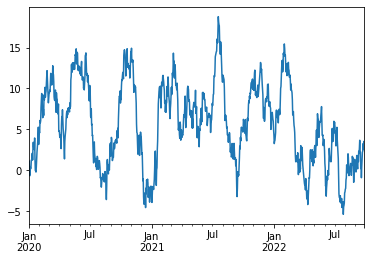

In [4]:
### np.random.randn(1000) 隨機產生1000個normal distrbution 的樣本
ts = pd.Series(np.random.randn(1000),index=pd.date_range('2020/1/1', periods=1000))

ts = ts.cumsum() ### row3 = row2+ row1 相加

ts.plot()

## pd.read_csv 讀檔 

* You can read data from a CSV file using the `read_csv` function. By default, it assumes that the fields are comma-separated.

* skipinitialspace：忽略分隔符後的空白（預設為False，即不忽略)
* comment='=': 起頭為"＝"是註解，不要讀進DataFrame
* header = 6: 表示header info 在7行



In [5]:
df=pd.read_csv('event6.txt',sep="|",header=0,skipinitialspace=True)

In [6]:
df.head()

,EventID,Time,Latitude,Longitude,Depth,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName
0,11254886,2020-06-18T12:49:53,-33.2938,-177.8383,10.00,"at,pt,us",NEIC PDE,us,"us6000ae4n,pt20170001,at00qc4gz1",Mww,7.4,us,SOUTH OF KERMADEC ISLANDS
1,11252039,2020-06-13T21:08:30,18.9225,145.1033,622.00,"us,pt",NEIC PDE,us,"pt20165055,us6000abgq",Mww,6.2,us,MARIANA ISLANDS
2,11251929,2020-06-13T15:51:23,28.9386,128.2621,159.62,"at,pt,us",NEIC PDE,us,"us6000abcq,at00qbvg1n,pt20165054",Mww,6.6,us,"RYUKYU ISLANDS, JAPAN"
3,11250134,2020-06-10T19:58:50,-15.7726,-13.0475,10.00,"us,pt,at",NEIC PDE,us,"at00qbq7i8,pt20162000,us6000a9ik",Mww,6.0,us,SOUTHERN MID-ATLANTIC RIDGE
4,11245920,2020-06-04T08:49:39,2.9231,128.2477,106.86,"pt,at,us",NEIC PDE,us,"us6000a5r3,pt20156001,at00qbe8it",mww,6.4,us,"HALMAHERA, INDONESIA"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EventID            50 non-null     int64  
 1   Time               50 non-null     object 
 2   Latitude           50 non-null     float64
 3   Longitude          50 non-null     float64
 4   Depth              50 non-null     float64
 5   Author             50 non-null     object 
 6   Catalog            50 non-null     object 
 7   Contributor        50 non-null     object 
 8   ContributorID      50 non-null     object 
 9   MagType            50 non-null     object 
 10  Magnitude          50 non-null     float64
 11  MagAuthor          50 non-null     object 
 12  EventLocationName  50 non-null     object 
dtypes: float64(4), int64(1), object(8)
memory usage: 5.2+ KB


In [8]:
df.describe()

,EventID,Latitude,Longitude,Depth,Magnitude
count,5.000000e+01,50.000000,50.000000,50.000000,50.000000
mean,1.120321e+07,5.744238,38.703996,85.049800,6.325600
std,2.773379e+04,28.661413,123.567230,143.359906,0.406519
min,1.116721e+07,-59.921200,-179.889200,2.700000,6.000000
25%,1.117682e+07,-11.812675,-76.734400,10.000000,6.025000
50%,1.120009e+07,0.658100,104.717650,20.840000,6.150000
75%,1.122540e+07,28.485725,144.335450,104.355000,6.475000
max,1.125489e+07,62.358000,171.061100,622.000000,7.700000


In [9]:
### 看有幾列幾欄
df.shape

(50, 13)

In [10]:
### 查看所有的colunm名字
df.columns

Index(['EventID ', 'Time ', 'Latitude ', 'Longitude ', 'Depth ', 'Author ',
       'Catalog ', 'Contributor ', 'ContributorID ', 'MagType ', 'Magnitude ',
       'MagAuthor ', 'EventLocationName'],
      dtype='object')

In [11]:
### 查看所有的index (row)
df.index

RangeIndex(start=0, stop=50, step=1)

In [12]:
### 修改所有的column名字
new_col={}
for col in df.columns:
    new_col[col]=str(col).strip()
print(new_col)

df.rename(columns=new_col,inplace=True) ### inplace=True 取代原本的df

{'EventID ': 'EventID', 'Time ': 'Time', 'Latitude ': 'Latitude', 'Longitude ': 'Longitude', 'Depth ': 'Depth', 'Author ': 'Author', 'Catalog ': 'Catalog', 'Contributor ': 'Contributor', 'ContributorID ': 'ContributorID', 'MagType ': 'MagType', 'Magnitude ': 'Magnitude', 'MagAuthor ': 'MagAuthor', 'EventLocationName': 'EventLocationName'}


In [13]:
### 查看每一個column的資料型態
df.dtypes

EventID                int64
Time                  object
Latitude             float64
Longitude            float64
Depth                float64
Author                object
Catalog               object
Contributor           object
ContributorID         object
MagType               object
Magnitude            float64
MagAuthor             object
EventLocationName     object
dtype: object

In [21]:
### 將時間資料改為時間格式
df['Time'] = pd.to_datetime(df['Time'])

In [22]:
### 注意 Ｔime的格式
df.dtypes

EventID                       int64
Time                 datetime64[ns]
Latitude                    float64
Longitude                   float64
Depth                       float64
Author                       object
Catalog                      object
Contributor                  object
ContributorID                object
MagType                      object
Magnitude                   float64
MagAuthor                    object
EventLocationName            object
dtype: object

In [16]:
"""
用column跟row的名字去取資料
df.loc[row,column]
：代表全部
"""
# df.dtypes!='object' 代表取column的dtype不等於object的那些column
df2=df.loc[:,df.dtypes!='object']

In [17]:
df2.head()

,EventID,Time,Latitude,Longitude,Depth,Magnitude
0,11254886,2020-06-18 12:49:53,-33.2938,-177.8383,10.00,7.4
1,11252039,2020-06-13 21:08:30,18.9225,145.1033,622.00,6.2
2,11251929,2020-06-13 15:51:23,28.9386,128.2621,159.62,6.6
3,11250134,2020-06-10 19:58:50,-15.7726,-13.0475,10.00,6.0
4,11245920,2020-06-04 08:49:39,2.9231,128.2477,106.86,6.4


In [24]:
### 設定以Ｔime column當作index
df=df.set_index('Time')
df

,EventID,Latitude,Longitude,Depth,Author,Catalog,Contributor,ContributorID,MagType,Magnitude,MagAuthor,EventLocationName
Time,,,,,,,,,,,,
2020-06-18 12:49:53,11254886,-33.2938,-177.8383,10.00,"at,pt,us",NEIC PDE,us,"us6000ae4n,pt20170001,at00qc4gz1",Mww,7.40,us,SOUTH OF KERMADEC ISLANDS
2020-06-13 21:08:30,11252039,18.9225,145.1033,622.00,"us,pt",NEIC PDE,us,"pt20165055,us6000abgq",Mww,6.20,us,MARIANA ISLANDS
2020-06-13 15:51:23,11251929,28.9386,128.2621,159.62,"at,pt,us",NEIC PDE,us,"us6000abcq,at00qbvg1n,pt20165054",Mww,6.60,us,"RYUKYU ISLANDS, JAPAN"
2020-06-10 19:58:50,11250134,-15.7726,-13.0475,10.00,"us,pt,at",NEIC PDE,us,"at00qbq7i8,pt20162000,us6000a9ik",Mww,6.00,us,SOUTHERN MID-ATLANTIC RIDGE
2020-06-04 08:49:39,11245920,2.9231,128.2477,106.86,"pt,at,us",NEIC PDE,us,"us6000a5r3,pt20156001,at00qbe8it",mww,6.40,us,"HALMAHERA, INDONESIA"
2020-06-03 07:35:34,11245000,-23.2955,-68.4217,96.84,"at,pt,us",NEIC PDE,us,"us6000a4yi,pt20155000,at00qbcaf9",mww,6.80,us,NORTHERN CHILE
2020-05-31 05:09:35,11242788,-15.2747,-70.6630,153.41,"us,at,pt",NEIC PDE,us,"pt20152000,us6000a316,at00qb6jnz",mww,6.00,us,SOUTHERN PERU
2020-05-27 07:09:10,11239832,-17.1569,167.8644,10.00,"us,at",NEIC PDE,us,"at00qazajh,us60009zv5",mww,6.10,us,VANUATU ISLANDS
2020-05-22 08:46:06,11235811,22.4152,-108.1275,10.00,"us,at,pt",NEIC PDE,us,"pt20143000,at00qaq5ow,us70009n5p",Mww,6.10,us,OFF COAST OF CENTRAL MEXICO


In [20]:
### index 使用
df2.loc['2020-06-18 12:49:53'].Latitude

# 等義 df2['2020-06-18 12:49:53'].Latitude
# 等義 df2.loc['2020-06-18 12:49:53','Latitude']


Time
2020-06-18 12:49:53   -33.2938
Name: Latitude, dtype: float64

In [25]:
### 整理資料的另外一種方法 - 直接取出['Time','Latitude','Longitude','Depth','Magnitude']
df=df.loc[:,['Time','Latitude','Longitude','Depth','Magnitude']] 

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [118]:
### 資料排序
"""
by='Depth' : 利用'Depth'這欄排序
ascending=True 由小到大排序
"""
df.sort_values(by='Depth',ascending=True).head(10)

,Time,Latitude,Longitude,Depth,Magnitude
9,2020-05-15 11:03:27,38.1689,-117.8497,2.70,6.5
44,2020-01-19 13:27:56,39.8353,77.1097,5.57,6.0
48,2020-01-07 08:24:25,17.8672,-66.8280,8.07,6.4
0,2020-06-18 12:49:53,-33.2938,-177.8383,10.00,7.4
46,2020-01-09 08:38:08,62.3580,171.0611,10.00,6.4
41,2020-01-23 05:53:02,51.9836,-177.8550,10.00,6.2
40,2020-01-24 17:55:13,38.3897,39.0883,10.00,6.7
36,2020-01-28 21:55:16,18.9437,-80.7420,10.00,6.1
29,2020-02-23 16:00:31,38.4933,44.3729,10.00,6.0
28,2020-03-14 10:01:16,-27.3664,-175.6074,10.00,6.4


##  iloc 單純用第幾欄第幾列排抓資料

iloc[row:column]

In [119]:
### 取第四欄的前五個資料
df.iloc[:,3].head()

0     10.00
1    622.00
2    159.62
3     10.00
4    106.86
Name: Depth, dtype: float64

In [59]:
### 判斷第四欄使否大於100
df.iloc[:,3]>100

0     False
1      True
2      True
3     False
4      True
5     False
6      True
7     False
8     False
9     False
10     True
11     True
12     True
13    False
14    False
15    False
16     True
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26     True
27    False
28    False
29    False
30     True
31    False
32    False
33    False
34     True
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43     True
44    False
45    False
46    False
47     True
48    False
49    False
Name: Depth, dtype: bool

In [60]:
### 取第四欄>100的資料
df[df.iloc[:,3]>100]

,Time,Latitude,Longitude,Depth,Magnitude
1,2020-06-13T21:08:30,18.9225,145.1033,622.00,6.2
2,2020-06-13T15:51:23,28.9386,128.2621,159.62,6.6
4,2020-06-04T08:49:39,2.9231,128.2477,106.86,6.4
6,2020-05-31T05:09:35,-15.2747,-70.6630,153.41,6.0
10,2020-05-12T22:41:12,-12.0662,166.6482,107.00,6.6
11,2020-05-07T11:21:19,-4.4543,154.7127,466.17,6.1
12,2020-05-06T13:53:56,-6.7949,129.8613,107.00,6.8
16,2020-04-18T08:25:37,27.1271,140.1312,453.00,6.6
26,2020-03-18T03:13:45,-13.1364,167.0277,176.00,6.1
30,2020-02-13T10:33:44,45.6313,148.9293,144.00,7.0


In [61]:
### 取第四欄是Depth所以也可以寫成
df[df.Depth>100]

,Time,Latitude,Longitude,Depth,Magnitude
1,2020-06-13T21:08:30,18.9225,145.1033,622.00,6.2
2,2020-06-13T15:51:23,28.9386,128.2621,159.62,6.6
4,2020-06-04T08:49:39,2.9231,128.2477,106.86,6.4
6,2020-05-31T05:09:35,-15.2747,-70.6630,153.41,6.0
10,2020-05-12T22:41:12,-12.0662,166.6482,107.00,6.6
11,2020-05-07T11:21:19,-4.4543,154.7127,466.17,6.1
12,2020-05-06T13:53:56,-6.7949,129.8613,107.00,6.8
16,2020-04-18T08:25:37,27.1271,140.1312,453.00,6.6
26,2020-03-18T03:13:45,-13.1364,167.0277,176.00,6.1
30,2020-02-13T10:33:44,45.6313,148.9293,144.00,7.0


## Easy plot

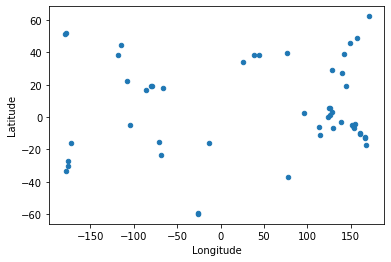

In [40]:
### 散佈圖
df.plot.scatter(x='Longitude',y='Latitude')

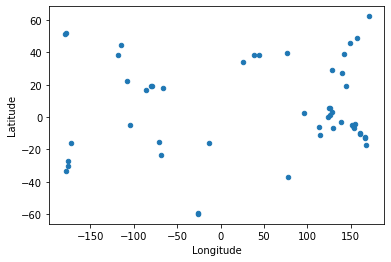

In [41]:
### x=2 , 用第三欄當作x
df.plot.scatter(x=2,y='Latitude')

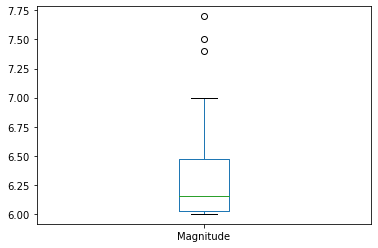

In [42]:
### 盒狀圖
df.Magnitude.plot.box()

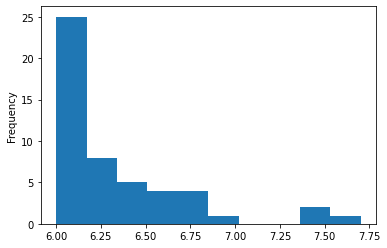

In [121]:
### 直方圖
df.Magnitude.plot.hist()

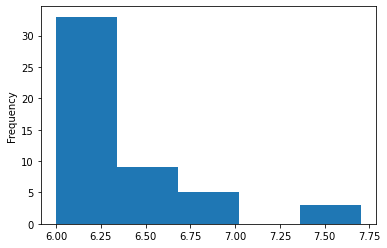

In [120]:
### 直方圖要分成五個 bin
df.Magnitude.plot.hist(bins=5)